In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


A beadandókban 2017 és 2024 között elemezzük ki a Bitcoin és Ethereum kriptovaluták árfolyammozgásainak pár tulajdonságát.

Először beolvassuk a nyers adatokat egy data framebe.

In [4]:
dfb =pd.read_csv('BTC-USD (2014-2024).csv')
dfe =pd.read_csv('ETH-USD (2017-2024).csv')
dfb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [6]:
dfb['Date'] = pd.to_datetime(dfb['Date'])
dfe['Date'] = pd.to_datetime(dfe['Date'])

dfb.set_index('Date', inplace=True)
dfe.set_index('Date', inplace=True)

Indexként megjelöltük a dátumot. Ezután megtisztítjuk az adatokat, először megnézzük, létezik a null érték.

In [8]:
print(dfb.isna().sum())
print(dfe.isna().sum())    

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


Ebből arra következtetnénk, hogy létezik egy nap, melyről az adatok hiányoznak, de lehet több oszlopot és napot érint. Vizsgáljuk meg.

In [10]:
print(dfb[dfb.isnull().any(axis=1)])
print(dfe[dfe.isnull().any(axis=1)])

            Open  High  Low  Close  Adj Close  Volume
Date                                                 
2024-01-20   NaN   NaN  NaN    NaN        NaN     NaN
            Open  High  Low  Close  Adj Close  Volume
Date                                                 
2024-01-20   NaN   NaN  NaN    NaN        NaN     NaN


Ahogy látjuk, 2024.01.20. dátumról hiányoznak az adatok. Ezt eltávolítjuk az adatokból

In [12]:
dfb = dfb.dropna(subset=['Adj Close'])
dfe = dfe.dropna(subset=['Adj Close'])

Következőleg a Bitcoin és Ethereum adatainkat egyesítsük egy data framebe. Azért, hogy ne legyenek azonosan elnevezett oszlopok, először hozzárakunk egy előtagot.

In [14]:
dfb = dfb.rename(columns=lambda x: 'BTC_' + x if x != 'Date' else x)
dfe = dfe.rename(columns=lambda x: 'ETH_' + x if x != 'Date' else x)
dfb.head()

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Adj Close,BTC_Volume
Date,,,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [15]:
df = dfb.join(dfe, how='inner')
df.head()

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Adj Close,BTC_Volume,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Adj Close,ETH_Volume
Date,,,,,,,,,,,,
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5.208250e+09,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4.908680e+09,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8.957350e+09,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6.263250e+09,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09
2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,6635.750000,3.197110e+09,316.763000,340.177002,316.763000,337.631012,337.631012,1.069680e+09


Inner joint használunk, így leszűrjük az adatokat azokra a dátumokra, melyeken mindkét valutáról van adatunk.

In [17]:
print(df['BTC_Close'].sum()-df['BTC_Adj Close'].sum())
print(df['ETH_Close'].sum()-df['ETH_Adj Close'].sum())

0.0
0.0


<Axes: xlabel='Date'>

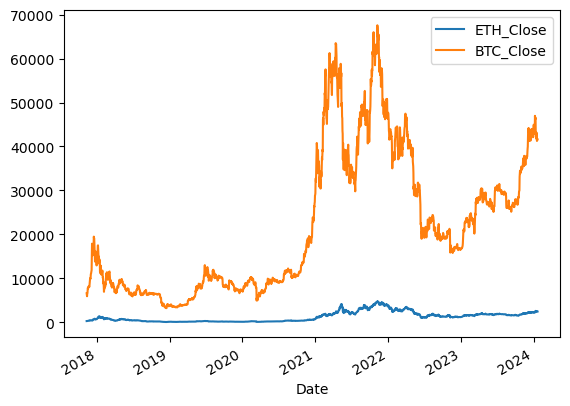

In [18]:

df[['ETH_Close', 'BTC_Close']].plot()



Látszódik, hogy van valamilyen közös mozgás a kettő valuta között, viszont a bitcoin ára magasabb, mint az ethereumé. Nézzük meg, átlagosan mekkora mértékbeli különbség van köztük.

In [20]:
print(df['BTC_Close'].sum()/df['ETH_Close'].sum())

17.40391418021228


Szorozzuk meg ezzel az értékkel az ethereumét, így könnyebben látható a közös mozgásuk.

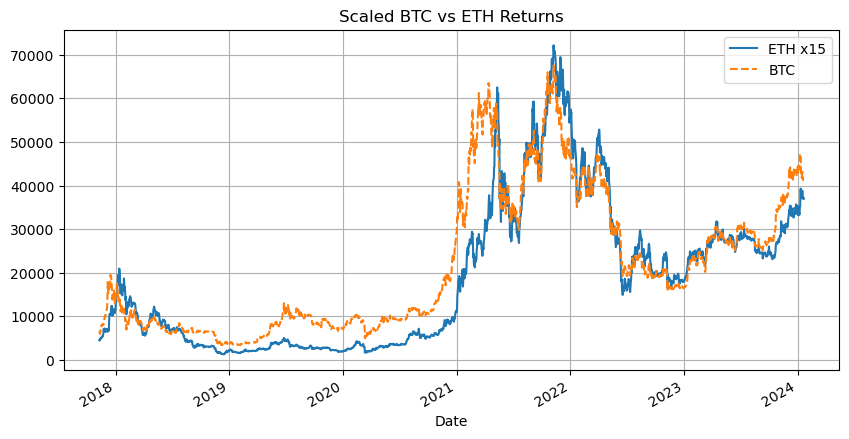

In [22]:
(df['ETH_Close'] * 15).plot(label='ETH x15', figsize=(10,5))
df['BTC_Close'].plot(label='BTC', linestyle='--')
plt.legend()
plt.title("Scaled BTC vs ETH Returns")
plt.grid(True)
plt.show()

Először vizsgáljuk meg a zárási árakból számított napi hozamokat

<Axes: xlabel='Date'>

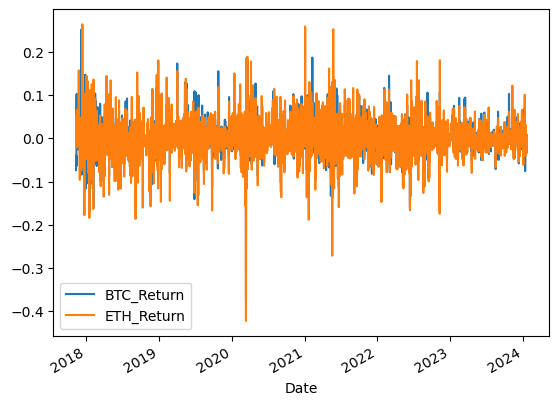

In [24]:
df['BTC_Return'] = dfb['BTC_Close'].pct_change()
df['ETH_Return'] = dfe['ETH_Close'].pct_change()

df[['BTC_Return', 'ETH_Return']].plot()

Ebből elkészíthetjük a 30 napos volatilitási mérőszámot, mely az áringadozások mértékének mérőszáma.

<Axes: title={'center': 'BTC 30-Day Rolling Volatility'}, xlabel='Date'>

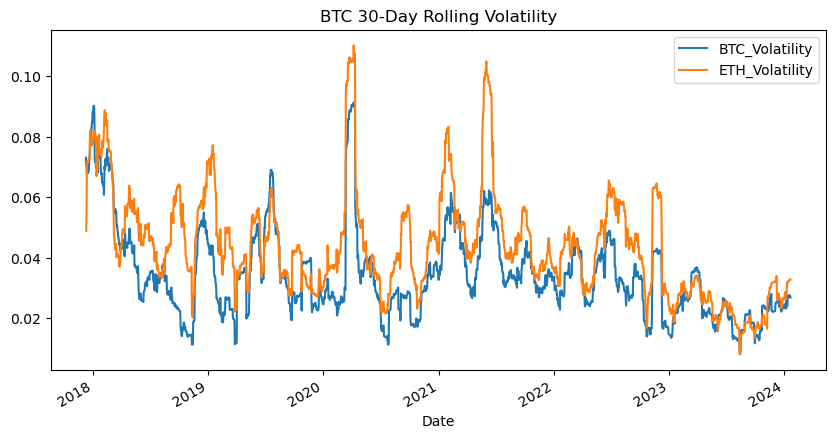

In [26]:
df['BTC_Volatility'] = df['BTC_Return'].rolling(window=30).std()
df['ETH_Volatility'] = df['ETH_Return'].rolling(window=30).std()

df[['BTC_Volatility', 'ETH_Volatility']].plot(figsize=(10, 5), title='BTC 30-Day Rolling Volatility')

Vizsgáljuk meg a napi volatilitást is a min és max segítségével

<Axes: xlabel='Date'>

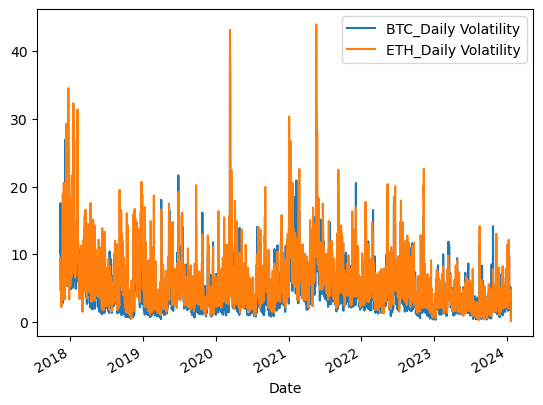

In [28]:
df['BTC_Daily Volatility'] = (df['BTC_High'] - df['BTC_Low']) / df['BTC_Open'] * 100
df['ETH_Daily Volatility'] = (df['ETH_High'] - df['ETH_Low']) / df['ETH_Open'] * 100
df[['BTC_Daily Volatility', 'ETH_Daily Volatility']].plot()

Megnézzük, hogy esetlegesen van-e kapcsolat a kereskedés mennyisége és a valuta ára között, először ábrázoljuk grafikonon.

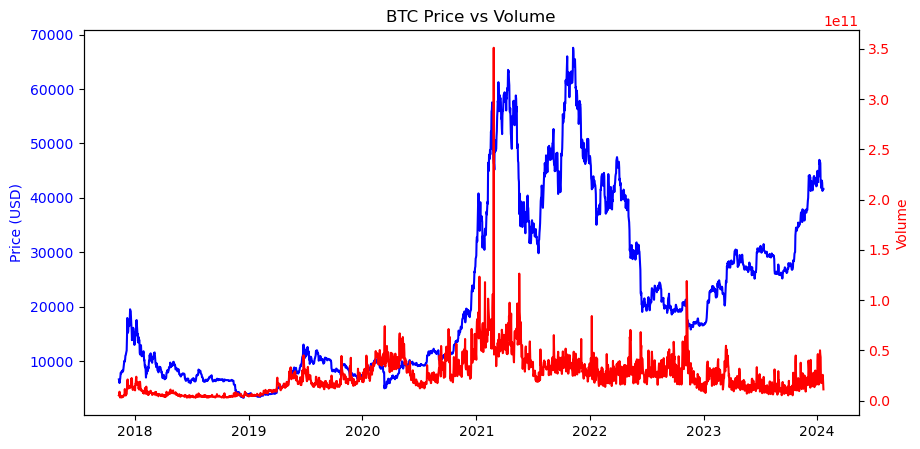

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df.index, df['BTC_Adj Close'], color='blue', label='BTC Price')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df.index, df['BTC_Volume'], color='red', label='BTC Volume')
ax2.set_ylabel('Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('BTC Price vs Volume')
plt.show()

Nézzük meg az Ethereummal is.

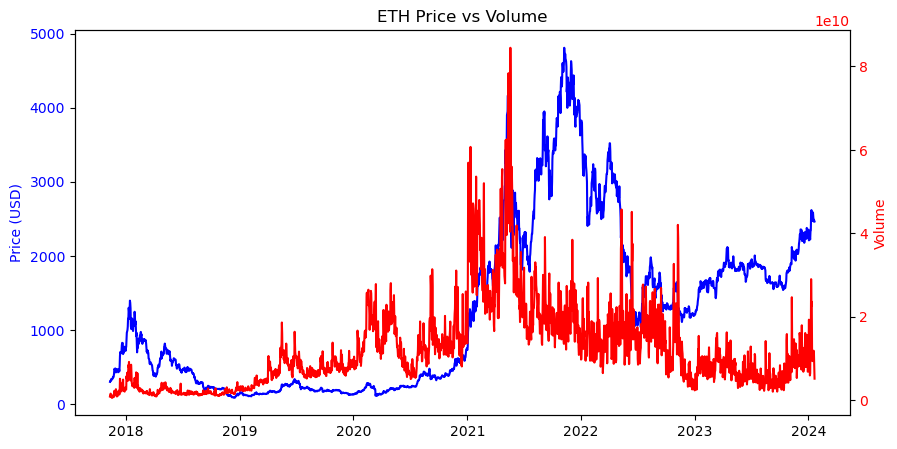

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df.index, dfe['ETH_Adj Close'], color='blue', label='ETH Price')
ax1.set_ylabel('Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df.index, df['ETH_Volume'], color='red', label='ETH Volume')
ax2.set_ylabel('Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('ETH Price vs Volume')
plt.show()

Látni vélünk valamely együttmozgást, de kisebb mértékben, mint mondjuk a két valuta árértékében. Vizsgáljuk meg a korrelációt konkrét számadatokkal.

In [34]:
correlation = df[['BTC_Return', 'BTC_Volume']].corr().iloc[0, 1]
print(f"BTC Price-Volume Correlation: {correlation:.2f}")

BTC Price-Volume Correlation: 0.00


Mérsékelt pozitív korrelációt találtunk. Nézzük meg egy scatterploton is.

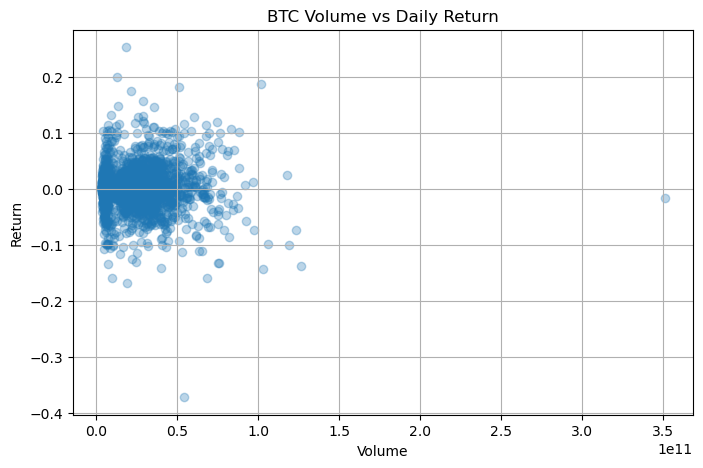

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(df['BTC_Volume'], df['BTC_Return'], alpha=0.3)
plt.title('BTC Volume vs Daily Return')
plt.xlabel('Volume')
plt.ylabel('Return')
plt.grid(True)
plt.show()

Látszódik, hogy létezik pár kiugró érték.

In [38]:
correlation = df[['ETH_Adj Close', 'ETH_Volume']].corr().iloc[0, 1]
print(f"ETH Price-Volume Correlation: {correlation:.2f}")

ETH Price-Volume Correlation: 0.47


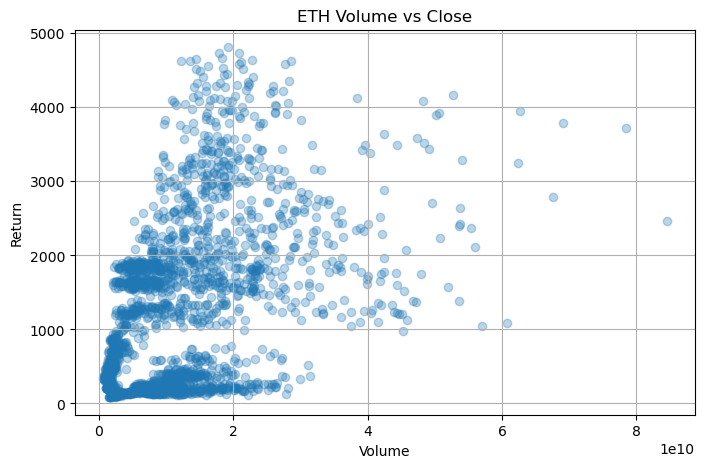

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(df['ETH_Volume'], df['ETH_Adj Close'], alpha=0.3)
plt.title('ETH Volume vs Close')
plt.xlabel('Volume')
plt.ylabel('Return')
plt.grid(True)
plt.show()

In [40]:
correlation = df[['ETH_Adj Close', 'BTC_Adj Close']].corr().iloc[0, 1]
print(f"ETH Price-BTC Price Correlation: {correlation:.2f}")

ETH Price-BTC Price Correlation: 0.92


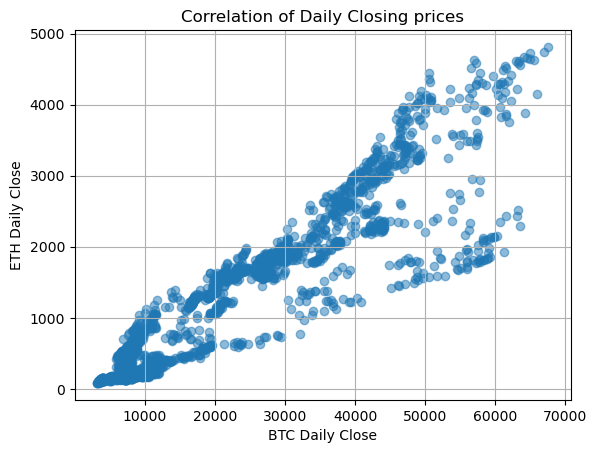

In [41]:
plt.scatter(df['BTC_Close'], df['ETH_Close'], alpha=0.5)
plt.xlabel('BTC Daily Close')
plt.ylabel('ETH Daily Close')
plt.title('Correlation of Daily Closing prices')
plt.grid(True)
plt.show()

In [42]:
correlation = df[['ETH_Return', 'BTC_Return']].corr().iloc[0, 1]
print(f"ETH Price-BTC Price Correlation: {correlation:.2f}")

ETH Price-BTC Price Correlation: 0.77


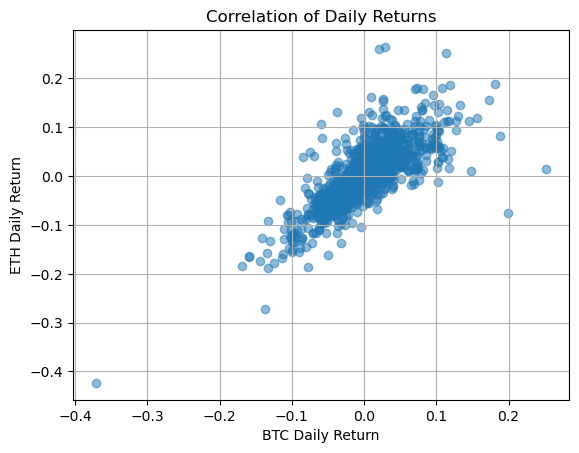

In [43]:
plt.scatter(df['BTC_Return'], df['ETH_Return'], alpha=0.5)
plt.xlabel('BTC Daily Return')
plt.ylabel('ETH Daily Return')
plt.title('Correlation of Daily Returns')
plt.grid(True)
plt.show()

In [44]:
df['BTC_Abs_Return'] = df['BTC_Return'].abs()
df['ETH_Abs_Return'] = df['ETH_Return'].abs()

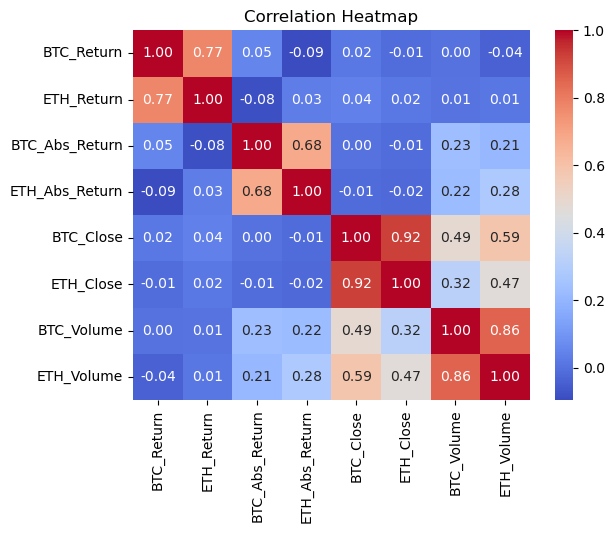

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['BTC_Return', 'ETH_Return','BTC_Abs_Return', 'ETH_Abs_Return' ,'BTC_Close', 'ETH_Close', 'BTC_Volume', 'ETH_Volume']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Következőleg megvizsgáljuk a kereszt korrelációkat, melynek lényege az, hogy megtudjuk, egyik valuta áringadozása megelőzi-e az egyiket.

C:\Users\User\anaconda3\Lib\site-packages\scipy\signal\_signaltools.py:243: RuntimeWarning: Use of fft convolution on input with NAN or inf results in NAN or inf output. Consider using method='direct' instead.
  return convolve(in1, _reverse_and_conj(in2), mode, method)


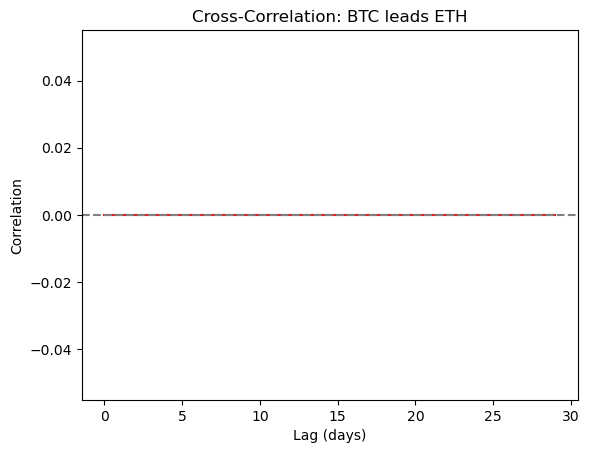

In [54]:
from statsmodels.tsa.stattools import ccf
#30 napos eltolást vizsgálunk, ezt a fent megnevezett package-gel
lags = 30
ccf_vals = ccf(df['BTC_Return'], df['ETH_Return'])[:lags]
#Ezt egy ábrán szemléltetjük, olvashatóbb, mint a nyers számadatok
plt.stem(range(lags), ccf_vals)
plt.title('Cross-Correlation: BTC leads ETH')
plt.xlabel('Lag (days)')
plt.ylabel('Correlation')
plt.axhline(0, color='gray', linestyle='--')
plt.show()

Következőleg megpróbálunk egy machine learning modellt készíteni. Feladatunk az lesz, hogy az aznapi mutatók, és árváltozások alapján megjósoljuk, hogy a következő napon a hozam pozitív, illetve negatív lesz. A kriptovaluták eléggé volatilis befektetések, eddig a legfejlettebb gépi tanulási modellek is csak kis mértékben jobbak a véletlenszerű találgatásnál.

In [56]:
dfml = df[df[['BTC_Return','ETH_Return']].notna().all(axis=1)].copy()

In [58]:
dfml = dfml.drop(['BTC_Volatility', 'ETH_Volatility', 'BTC_Daily Volatility', 'ETH_Daily Volatility'], axis = 1)
print(dfml.isna().sum())         


BTC_Open          0
BTC_High          0
BTC_Low           0
BTC_Close         0
BTC_Adj Close     0
BTC_Volume        0
ETH_Open          0
ETH_High          0
ETH_Low           0
ETH_Close         0
ETH_Adj Close     0
ETH_Volume        0
BTC_Return        0
ETH_Return        0
BTC_Abs_Return    0
ETH_Abs_Return    0
dtype: int64


In [60]:
#Machine Learning(kriptóra nehezen alkalmazható)

dfml['BTC_Target'] = (dfml['BTC_Return'].shift(-1) > 0).astype(int)
dfml['ETH_Target'] = (dfml['ETH_Return'].shift(-1) > 0).astype(int)
dfml.dropna(subset=['BTC_Return', 'ETH_Return', 'BTC_Target', 'ETH_Target'], inplace=True)
dfml.tail()
print(dfml.isna().sum())     

BTC_Open          0
BTC_High          0
BTC_Low           0
BTC_Close         0
BTC_Adj Close     0
BTC_Volume        0
ETH_Open          0
ETH_High          0
ETH_Low           0
ETH_Close         0
ETH_Adj Close     0
ETH_Volume        0
BTC_Return        0
ETH_Return        0
BTC_Abs_Return    0
ETH_Abs_Return    0
BTC_Target        0
ETH_Target        0
dtype: int64


In [62]:
from sklearn.model_selection import train_test_split
X = dfml.drop(columns=['ETH_Open','ETH_High','ETH_Low','ETH_Close','ETH_Adj Close','ETH_Volume', 'ETH_Target', 'ETH_Return', 'BTC_Target', 'BTC_Adj Close'])
y = dfml['BTC_Target']


In [64]:
X.head()

,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Return,BTC_Abs_Return,ETH_Abs_Return
Date,,,,,,,,
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,4.908680e+09,-0.039368,0.039368,0.051555
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,8.957350e+09,-0.064101,0.064101,0.021523
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6.263250e+09,0.102422,0.102422,0.028606
2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,3.197110e+09,0.011626,0.011626,0.066037
2017-11-15,6634.759766,7342.250000,6634.759766,7315.540039,4.200880e+09,0.102444,0.102444,0.012659


In [66]:
print(y)

Date
2017-11-11    0
2017-11-12    1
2017-11-13    1
2017-11-14    1
2017-11-15    1
             ..
2024-01-16    0
2024-01-17    0
2024-01-18    1
2024-01-19    1
2024-01-21    0
Name: BTC_Target, Length: 2262, dtype: int32


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=1, min_samples_split=3)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.41      0.46       332
           1       0.53      0.63      0.57       347

    accuracy                           0.52       679
   macro avg       0.52      0.52      0.52       679
weighted avg       0.52      0.52      0.52       679



In [72]:
y_random = np.random.randint(0, 2, size=y_test.shape)
print(classification_report(y_test, y_random))

              precision    recall  f1-score   support

           0       0.49      0.52      0.51       332
           1       0.51      0.48      0.50       347

    accuracy                           0.50       679
   macro avg       0.50      0.50      0.50       679
weighted avg       0.50      0.50      0.50       679

